<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data_multi_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.484995,77.392992,26.033631,37.352746,-0.156606,225.107757,225.280714,-0.172957
1,0.0,1.0,68.779025,99.116795,58.954447,85.947659,-0.067323,322.730603,322.732638,-0.002035
2,0.0,2.0,48.369300,37.922639,80.292597,35.719472,0.203106,212.507114,212.383138,0.123976
3,0.0,3.0,56.692468,41.748965,92.893576,86.658338,0.233320,288.226668,288.005261,0.221407
4,0.0,4.0,36.165301,44.514199,53.025482,28.101644,0.355592,172.162219,171.870729,0.291490
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.263245,55.468135,27.168433,69.942701,0.499908,222.342421,221.913351,0.429070
249996,999.0,246.0,91.697411,91.691813,47.437514,71.092336,0.066161,311.985236,311.945111,0.040125
249997,999.0,247.0,51.803022,31.553501,75.404168,34.794602,-0.045591,203.509701,203.545047,-0.035346
249998,999.0,248.0,61.395271,81.272710,20.214945,63.425024,0.578926,236.886877,236.349462,0.537415


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.484995  77.392992  26.033631  37.352746 -0.156606  225.107757   
      1.0    68.779025  99.116795  58.954447  85.947659 -0.067323  322.730603   
      2.0    48.369300  37.922639  80.292597  35.719472  0.203106  212.507114   
      3.0    56.692468  41.748965  92.893576  86.658338  0.233320  288.226668   
      4.0    36.165301  44.514199  53.025482  28.101644  0.355592  172.162219   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  59.263245  55.468135  27.168433  69.942701  0.499908  222.342421   
      246.0  91.697411  91.691813  47.437514  71.092336  0.066161  311.985236   
      247.0  51.803022  31.553501  75.404168  34.794602 -0.045591  203.509701   
      248.0  61.395271  81.272710  20.214945  63.425024  0.578926  236.886877   
      249.0  69.799006  39.173962  22.026686  60.234834  0.434771  201.669259   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.280714 -0.172957  
      1.0    322.732638 -0.002035  
      2.0    212.383138  0.123976  
      3.0    288.005261  0.221407  
      4.0    171.870729  0.291490  
...                 ...       ...  
999.0 245.0  221.913351  0.429070  
      246.0  311.945111  0.040125  
      247.0  203.545047 -0.035346  
      248.0  236.349462  0.537415  
      249.0  201.329902  0.339357  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.484995  77.392992  26.033631  37.352746 -0.156606  225.107757   
      1.0    68.779025  99.116795  58.954447  85.947659 -0.067323  322.730603   
      2.0    48.369300  37.922639  80.292597  35.719472  0.203106  212.507114   
      3.0    56.692468  41.748965  92.893576  86.658338  0.233320  288.226668   
      4.0    36.165301  44.514199  53.025482  28.101644  0.355592  172.162219   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  59.263245  55.468135  27.168433  69.942701  0.499908  222.342421   
      246.0  91.697411  91.691813  47.437514  71.092336  0.066161  311.985236   
      247.0  51.803022  31.553501  75.404168  34.794602 -0.045591  203.509701   
      248.0  61.395271  81.272710  20.214945  63.425024  0.578926  236.886877   
      249.0  69.799006  39.173962  22.026686  60.234834  0.434771  201.669259   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.280714 -0.172957  
      1.0    322.732638 -0.002035  
      2.0    212.383138  0.123976  
      3.0    288.005261  0.221407  
      4.0    171.870729  0.291490  
...                 ...       ...  
999.0 245.0  221.913351  0.429070  
      246.0  311.945111  0.040125  
      247.0  203.545047 -0.035346  
      248.0  236.349462  0.537415  
      249.0  201.329902  0.339357  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,74.484995,77.392992,26.033631,37.352746,-0.156606,225.107757,225.280714,-0.172957
1,0.0,1.0,68.779025,99.116795,58.954447,85.947659,-0.067323,322.730603,322.732638,-0.002035
2,0.0,2.0,48.369300,37.922639,80.292597,35.719472,0.203106,212.507114,212.383138,0.123976
3,0.0,3.0,56.692468,41.748965,92.893576,86.658338,0.233320,288.226668,288.005261,0.221407
4,0.0,4.0,36.165301,44.514199,53.025482,28.101644,0.355592,172.162219,171.870729,0.291490
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,59.263245,55.468135,27.168433,69.942701,0.499908,222.342421,221.913351,0.429070
249996,999.0,246.0,91.697411,91.691813,47.437514,71.092336,0.066161,311.985236,311.945111,0.040125
249997,999.0,247.0,51.803022,31.553501,75.404168,34.794602,-0.045591,203.509701,203.545047,-0.035346
249998,999.0,248.0,61.395271,81.272710,20.214945,63.425024,0.578926,236.886877,236.349462,0.537415


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    74.484995  77.392992  26.033631  37.352746 -0.156606  225.107757   
      1.0    68.779025  99.116795  58.954447  85.947659 -0.067323  322.730603   
      2.0    48.369300  37.922639  80.292597  35.719472  0.203106  212.507114   
      3.0    56.692468  41.748965  92.893576  86.658338  0.233320  288.226668   
      4.0    36.165301  44.514199  53.025482  28.101644  0.355592  172.162219   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  59.263245  55.468135  27.168433  69.942701  0.499908  222.342421   
      246.0  91.697411  91.691813  47.437514  71.092336  0.066161  311.985236   
      247.0  51.803022  31.553501  75.404168  34.794602 -0.045591  203.509701   
      248.0  61.395271  81.272710  20.214945  63.425024  0.578926  236.886877   
      249.0  69.799006  39.173962  22.026686  60.234834  0.434771  201.669259   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    225.280714 -0.172957  
      1.0    322.732638 -0.002035  
      2.0    212.383138  0.123976  
      3.0    288.005261  0.221407  
      4.0    171.870729  0.291490  
...                 ...       ...  
999.0 245.0  221.913351  0.429070  
      246.0  311.945111  0.040125  
      247.0  203.545047 -0.035346  
      248.0  236.349462  0.537415  
      249.0  201.329902  0.339357  

[250000 rows x 8 columns]

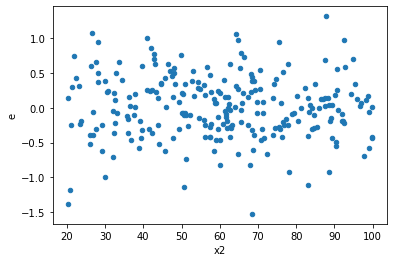

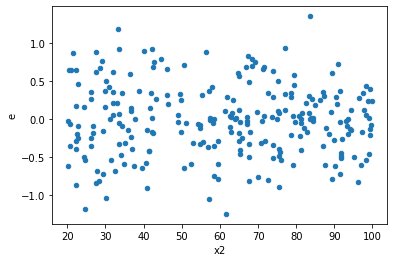

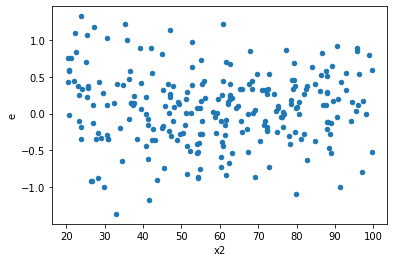

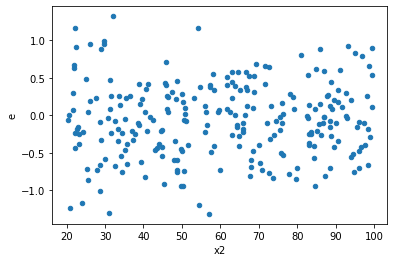

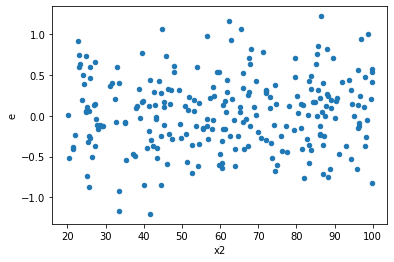

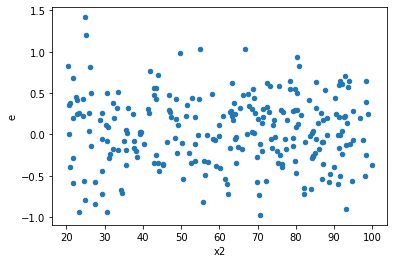

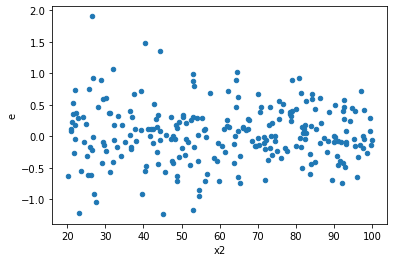

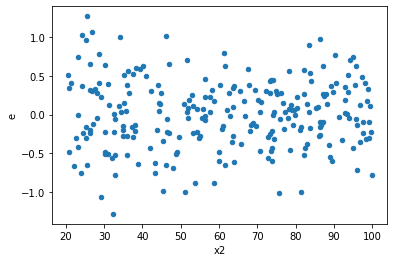

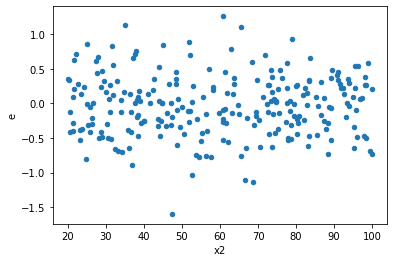

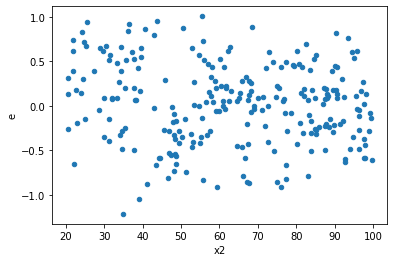

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[['x1', 'x2', 'x3', 'x4']]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,122.0,120.0,25.420871415006697,27.279127900008003,0.20836779848366146,0.22732606583340004,1.0909846314435439,0.6331453200577097,0.6834273399711451,0.31657266002885487,Reject001=1 : Homoscedasticity
2.0,138.0,104.0,33.531329613515204,25.39861646045479,0.24298064937329858,0.24421746596591143,1.0050901855592322,0.9848600327527648,0.5075699836236176,0.4924300163763824,Reject001=1 : Homoscedasticity
4.0,127.0,115.0,24.655486175223494,23.37675109278062,0.19413768641908263,0.2032760964589619,1.0470717984150295,0.8033348404982963,0.5983325797508519,0.40166742024914814,Reject001=1 : Homoscedasticity
5.0,116.0,126.0,19.00123452566155,24.569576389221762,0.1638037459108754,0.19499663800969652,1.1904284418244804,0.337569509955185,0.8312152450224075,0.1687847549775925,Reject001=1 : Homoscedasticity
6.0,121.0,121.0,24.4723680227855,28.215980042990218,0.20225097539492148,0.23318991771066297,1.1529730190686553,0.43483394185389956,0.7825830290730502,0.21741697092694978,Reject001=1 : Homoscedasticity
9.0,124.0,118.0,25.02772451729547,24.5809647152562,0.2018364880427054,0.20831326029878136,1.0320892040823935,0.8636144224785836,0.5681927887607082,0.4318072112392918,Reject001=1 : Homoscedasticity
11.0,109.0,133.0,22.06805499786691,31.460959497578603,0.2024592201639166,0.23654856765096693,1.1683763646795176,0.3910535469969698,0.8044732265015151,0.1955267734984849,Reject001=1 : Homoscedasticity
17.0,120.0,122.0,18.466992239713367,34.01892543148397,0.1538916019976114,0.27884365107773745,1.8119484589033357,0.0011871107916245904,0.9994064446041877,0.0005935553958122952,Reject001=0 : Heteroscedasticity
19.0,129.0,113.0,15.203173491888924,29.76628685118517,0.11785405807665833,0.2634184677096033,2.2351242885354226,1.65447665456675e-05,0.9999917276167272,8.27238327283375e-06,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,129.0,113.0,29.748531931900324,19.643041533638478,0.230608774665894,0.17383222596140246,0.7537971016638486,0.12015064636743315,Reject001=1 : Homoscedasticity
1.0,122.0,120.0,25.420871415006697,27.279127900008003,0.20836779848366146,0.22732606583340004,1.0909846314435439,0.6331453200577097,Reject001=1 : Homoscedasticity
2.0,138.0,104.0,33.531329613515204,25.39861646045479,0.24298064937329858,0.24421746596591143,1.0050901855592322,0.9848600327527648,Reject001=1 : Homoscedasticity
3.0,110.0,132.0,29.778484094388574,27.495938118295076,0.27071349176716886,0.20830256150223542,0.7694576289584751,0.15582638429276197,Reject001=1 : Homoscedasticity
4.0,127.0,115.0,24.655486175223494,23.37675109278062,0.19413768641908263,0.2032760964589619,1.0470717984150295,0.8033348404982963,Reject001=1 : Homoscedasticity
5.0,116.0,126.0,19.00123452566155,24.569576389221762,0.1638037459108754,0.19499663800969652,1.1904284418244804,0.337569509955185,Reject001=1 : Homoscedasticity
6.0,121.0,121.0,24.4723680227855,28.215980042990218,0.20225097539492148,0.23318991771066297,1.1529730190686553,0.43483394185389956,Reject001=1 : Homoscedasticity
7.0,118.0,124.0,23.54137507264491,24.134338410426608,0.19950317858173652,0.19463176137440813,0.9755822576764983,0.8933065133144377,Reject001=1 : Homoscedasticity
8.0,114.0,128.0,24.46930470326746,21.925791725406746,0.21464302371287247,0.1712952478547402,0.7980471244380227,0.21921888861402083,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      952
Reject001=0 : Heteroscedasticity     48
Name: Result_test, dtype: int64